# Testing functions and extracting features from objectmapping.py:


In [1]:
# %% Cell 1
import warnings
warnings.simplefilter('ignore', FutureWarning)
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from objectmapping import ObjectMapping
from mrcnn_classes import class_names
from itertools import permutations, combinations
from collections import defaultdict
import os

Using TensorFlow backend.


In [2]:
%%time
# %% Cell 2
# define the test configuration
class TestConfig(Config):
    NAME = "test"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 80

# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# load coco model weights
rcnn.load_weights('../data/mask_rcnn_coco.h5', by_name=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead
CPU times: user 10.5 s, sys: 616 ms, total: 11.1 s
Wall time: 11 s


In [3]:
# %% Cell 3
def area_from_box(h1, w1, h2, w2):
        return abs(h1-h2)*abs(w1-w2)
    
def depth_response(a, b):
    while True:
        print('\n')
        print(f"Are objects {a} and {b} at the same depth level?")        
        print("0: no")
        print("1: yes")
        response = input()
        if response == '1':
            break
        elif response == '0':
            break
    return int(response)

def frontbehind_response(a, b):
    while True:
        print('\n')
        print(f"If touching, is object {a} in front of or behind {b}?")        
        print("0: behind")
        print("1: in front")
        print("2: neither or not touching")
        response = input()
        if response == '0':
            break
        elif response == '1':
            break
        elif response == '2':
            break
    return int(response)

def invson_response(a, b):
    while True:
        print('\n')
        print(f"Is object {a} in object {b}?")        
        print("0: no")
        print("1: yes")
        response = input()
        if response == '0':
            break
        elif response == '1':
            break
    return int(response)

def relation_response(k, v):
    while True:
        print('\n')
        print(f"Verify '{k}' relationship for {v}")        
        print("0: Not Correct")
        print("1: Correct")
        response = input()
        if response == '0':
            break
        elif response == '1':
            break
    return int(response)

def depth_relation_response(k, v):
    while True:
        print('\n')
        print(f"Considering depth: Verify '{k}' relationship for {v}")        
        print("0: Not Correct")
        print("1: Correct")
        response = input()
        if response == '0':
            break
        elif response == '1':
            break
    return int(response)

def location_response(location):
    while True:
        print('\n')
        print(f"Verify {location}")        
        print("0: Not Correct")
        print("1: Correct")
        response = input()
        if response == '0':
            break
        elif response == '1':
            break
    return int(response)

def description_response(object_description):
    while True:
        print('\n')
        print(f"Is the object a/an {object_description}")        
        print("0: Not Correct")
        print("1: Correct")
        response = input()
        if response == '0':
            break
        elif response == '1':
            break
    return int(response)


#### Prepare text file with list of images with filepaths. Copy the file to session.txt and place session.txt in source folder. (Place session.txt in .gitignore file)

In [4]:
# %% Cell 4
with open('session.txt', 'r') as f:
    image_list = f.read().splitlines()
image_list = [i.strip('\"') for i in image_list]

<a id='input'></a>
### Start loading of next image from here by executing the following pop command:

In [39]:
# %% Cell 5
image_filename = image_list.pop(0)

#### If the image has an error during processing, uncomment the below cell and run. Then execute the above cell to pop the next image file. Don't forget to re-comment out the cell below after running the cell. This just puts the filename to the end of the list.

In [ ]:
# %% Cell 6
# image_list.append(image_filename)

#### If you need to stop before finishing the processing of the list, you can write the remaining files in the list back out to a text file by uncommenting and running the next cell. Then when you're ready to resume, execute Cells 1-4, but make sure that the file being opened in Cell 4, is the same one written to in Cell 7.

In [45]:
# # %% Cell 7
# with open('session.txt', 'w') as f:
#     for i in image_list:
#         f.write(f"{i}\n")

In [40]:
# %% Cell 8
# load image
imagefile = image_filename
img = load_img(imagefile)
img_array = img_to_array(img)
# make prediction
results = rcnn.detect([img_array], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
imap = ObjectMapping(imagefile, r, class_names)

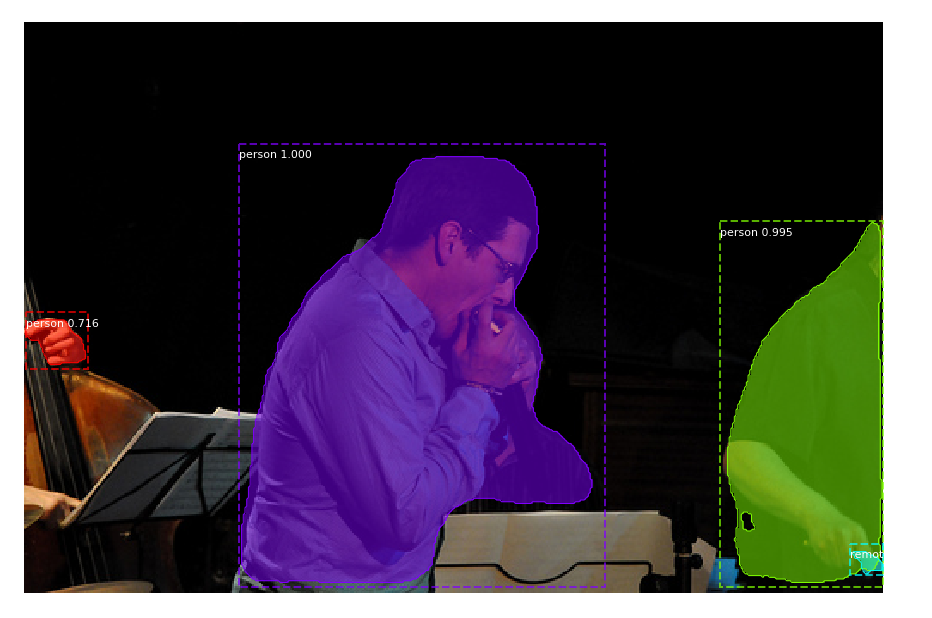



Is the object a/an person
0: Not Correct
1: Correct
1


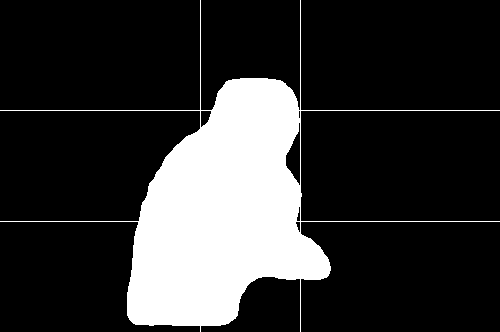



Verify {'vertical': {'center', 'top', 'bottom'}, 'horizontal': {'left', 'right', 'center'}}
0: Not Correct
1: Correct
1


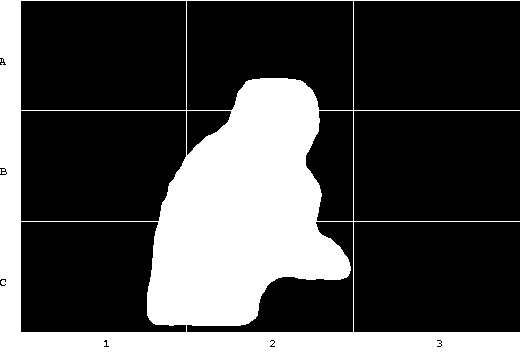



Verify {('A', 3), ('C', 2), ('A', 2), ('C', 3), ('C', 1), ('B', 1), ('B', 2), ('B', 3), ('A', 1)}
0: Not Correct
1: Correct
1


Is the object a/an person
0: Not Correct
1: Correct
1


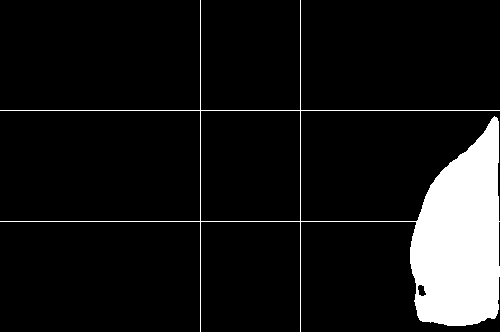



Verify {'vertical': {'center', 'bottom'}, 'horizontal': {'right'}}
0: Not Correct
1: Correct
1


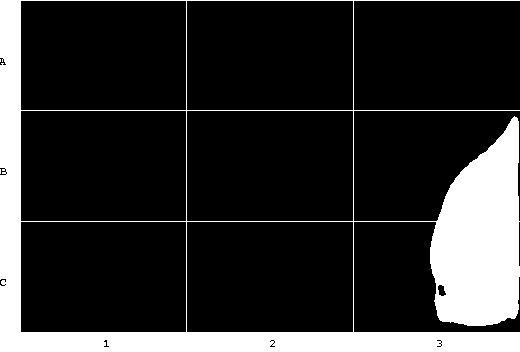



Verify {('C', 3), ('B', 3)}
0: Not Correct
1: Correct
1


Is the object a/an remote
0: Not Correct
1: Correct
0


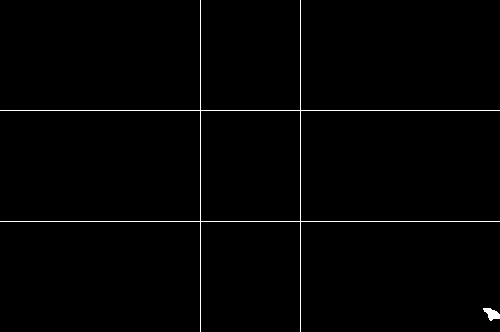



Verify {'vertical': {'bottom'}, 'horizontal': {'right'}}
0: Not Correct
1: Correct
1


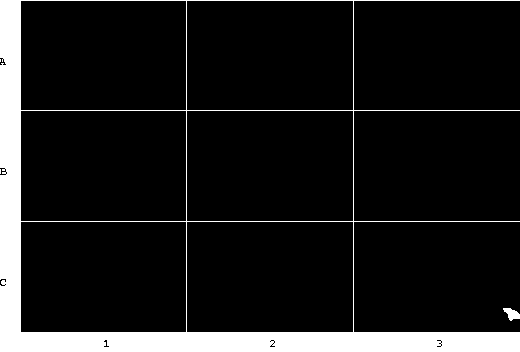



Verify {('C', 3)}
0: Not Correct
1: Correct
1


Is the object a/an person
0: Not Correct
1: Correct
1


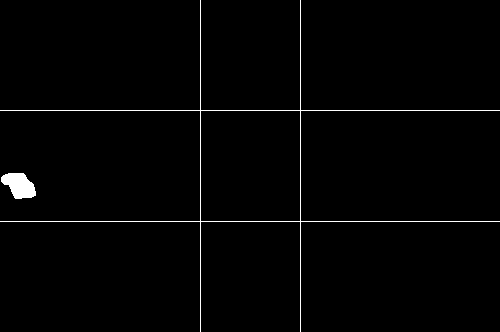



Verify {'vertical': {'center'}, 'horizontal': {'left'}}
0: Not Correct
1: Correct
1


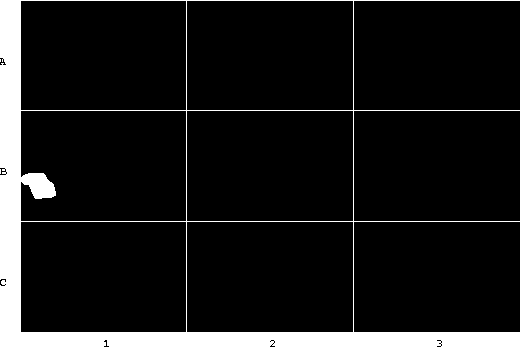



Verify {('B', 1)}
0: Not Correct
1: Correct
1


Verify 'next to' relationship for set()
0: Not Correct
1: Correct
1


Considering depth: Verify 'next to' relationship for set()
0: Not Correct
1: Correct
1


Verify 'above' relationship for set()
0: Not Correct
1: Correct
1


Considering depth: Verify 'above' relationship for set()
0: Not Correct
1: Correct
1


Verify 'below' relationship for set()
0: Not Correct
1: Correct
1


Considering depth: Verify 'below' relationship for set()
0: Not Correct
1: Correct
1


Verify 'touching' relationship for set()
0: Not Correct
1: Correct
1


Considering depth: Verify 'touching' relationship for set()
0: Not Correct
1: Correct
1


Verify 'on' relationship for set()
0: Not Correct
1: Correct
1


Considering depth: Verify 'on' relationship for set()
0: Not Correct
1: Correct
1


Verify 'in' relationship for set()
0: Not Correct
1: Correct
1


Considering depth: Verify 'in' relationship for set()
0: Not Correct
1: Correct
1


Are objects 1 and 2 at

In [41]:
# %% Cell 9
if imap.total_objects <= 1:
    print('Not enough objects detected.')        
else:
    max_objects = 6
    image_data = defaultdict(list)
    object_bb = {}
    object_mb = {}
    areas_bb = {}
    areas_mb = {}
    object_pixels = {}
    ids = []
    object_locations = []
    object_grid_coords = []
    object_locations_response = []
    object_grid_coords_response = []
    object_description_response = []
    
    for i in range(1, imap.total_objects+1):
        object_bb[i] = imap.get_box(i)
        object_mb[i] = imap.mass_box(i)
        object_pixels[i] = imap.mask_pixel_count(i)
        ids.append(i)
        areas_bb[i] = area_from_box(*object_bb[i])
        areas_mb[i] = area_from_box(*object_mb[i])
    
    ids = [i for i in ids if i < max_objects] # Limits the objects detected.
    image_area = imap.img_height*imap.img_width
    ptot_bb_area = sum(areas_bb.values())
    ptot_mb_area = sum(areas_mb.values())
    ptot_mask_pixels = sum(object_pixels.values())
    
    display_instances(img_array, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
    
    # Collect and annotate detection, location and grid information
    for object_id in ids:
        imap.object_outline(object_id, show_id=True).show()
        object_description = imap.object_class(object_id)
        object_description_response.append(description_response(object_description))
        location = imap.object_location(object_id, grid=True)
        object_locations.append(location)
        object_locations_response.append(location_response(location))
        location = imap.grid_coords(object_id, grid=True)
        object_grid_coords.append(location)
        object_grid_coords_response.append(location_response(location))
  
    object_combos = combinations(ids, r=2) # choose combinations or permutations
    for a, b in object_combos:
        # Overall image data
        image_data['filename'].append(imap.filename)
        image_data['image height'].append(imap.img_height)
        image_data['image width'].append(imap.img_width)
        image_data['total objects'].append(imap.total_objects)
        image_data['% total pixels'].append(ptot_mask_pixels/image_area)
        image_data['% total bb area'].append(ptot_bb_area/image_area)
        image_data['% total mb area'].append(ptot_mb_area/image_area)
        
        # Object A relationship to image
        image_data['objectA ID'].append(a)
        image_data['objectA'].append(imap.object_class(a))
        image_data['objectA location'].append(object_locations[a-1])
        image_data['check objectA location'].append(object_locations_response[a-1])
        image_data['objectA grid'].append(object_grid_coords[a-1])
        image_data['check objectA grid'].append(object_grid_coords_response[a-1])
        image_data['check objectA description'].append(object_description_response[a-1])
        image_data['A % bb area'].append(areas_bb[a]/image_area)
        image_data['A % mb area'].append(areas_mb[a]/image_area)
        image_data['A diff bbmb image area'].append(image_data['A % bb area'][-1]-\
                                                  image_data['A % mb area'][-1])
        image_data['A % bb area of sum bb'].append(areas_bb[a]/ptot_bb_area)
        image_data['A % mb area of sum mb'].append(areas_mb[a]/ptot_mb_area)
        image_data['A diff bbmb box area'].append(image_data['A % bb area of sum bb'][-1]-\
                                                  image_data['A % mb area of sum mb'][-1])
        image_data['A % top bb'].append(object_bb[a][0]/imap.img_height)
        image_data['A % left bb'].append(object_bb[a][1]/imap.img_width)
        image_data['A % bottom bb'].append(object_bb[a][2]/imap.img_height)
        image_data['A % right bb'].append(object_bb[a][3]/imap.img_width)
        image_data['A % top mb'].append(object_mb[a][0]/imap.img_height)
        image_data['A % left mb'].append(object_mb[a][1]/imap.img_width)
        image_data['A % bottom mb'].append(object_mb[a][2]/imap.img_height)
        image_data['A % right mb'].append(object_mb[a][3]/imap.img_width)
        image_data['A % pixels of image area'].append(object_pixels[a]/image_area)
        image_data['A % pixels of bb area'].append(object_pixels[a]/areas_bb[a])
        image_data['A % pixels of mb area'].append(object_pixels[a]/areas_mb[a])
        image_data['A % pixels of total pixels'].append(object_pixels[a]/ptot_mask_pixels)
        image_data['A % bb height'].append(abs(object_bb[a][0]-object_bb[a][2])/imap.img_height)
        image_data['A % bb width'].append(abs(object_bb[a][1]-object_bb[a][3])/imap.img_width)
        image_data['A % mb height'].append(abs(object_mb[a][0]-object_mb[a][2])/imap.img_height)
        image_data['A % mb width'].append(abs(object_mb[a][1]-object_mb[a][3])/imap.img_width)
        
        # Object B relationship to image
        image_data['objectB ID'].append(b)
        image_data['objectB'].append(imap.object_class(b))
        image_data['objectB location'].append(object_locations[b-1])
        image_data['check objectB location'].append(object_locations_response[b-1])
        image_data['objectB grid'].append(object_grid_coords[b-1])
        image_data['check objectB grid'].append(object_grid_coords_response[b-1])
        image_data['check objectB description'].append(object_description_response[b-1])
        image_data['B % bb area'].append(areas_bb[b]/image_area)
        image_data['B % mb area'].append(areas_mb[b]/image_area)
        image_data['B diff bbmb image area'].append(image_data['B % bb area'][-1]-\
                                                  image_data['B % mb area'][-1])
        image_data['B % bb area of sum bb'].append(areas_bb[b]/ptot_bb_area)
        image_data['B % mb area of sum mb'].append(areas_mb[b]/ptot_mb_area)
        image_data['B diff bbmb box area'].append(image_data['B % bb area of sum bb'][-1]-\
                                                  image_data['B % mb area of sum mb'][-1])
        image_data['B % top bb'].append(object_bb[b][0]/imap.img_height)
        image_data['B % left bb'].append(object_bb[b][1]/imap.img_width)
        image_data['B % bottom bb'].append(object_bb[b][2]/imap.img_height)
        image_data['B % right bb'].append(object_bb[b][3]/imap.img_width)
        image_data['B % top mb'].append(object_mb[b][0]/imap.img_height)
        image_data['B % left mb'].append(object_mb[b][1]/imap.img_width)
        image_data['B % bottom mb'].append(object_mb[b][2]/imap.img_height)
        image_data['B % right mb'].append(object_mb[b][3]/imap.img_width)
        image_data['B % pixels of image area'].append(object_pixels[b]/image_area)
        image_data['B % pixels of bb area'].append(object_pixels[b]/areas_bb[b])
        image_data['B % pixels of mb area'].append(object_pixels[b]/areas_mb[b])
        image_data['B % pixels of total pixels'].append(object_pixels[b]/ptot_mask_pixels)
        image_data['B % bb height'].append(abs(object_bb[b][0]-object_bb[b][2])/imap.img_height)
        image_data['B % bb width'].append(abs(object_bb[b][1]-object_bb[b][3])/imap.img_width)
        image_data['B % mb height'].append(abs(object_mb[b][0]-object_mb[b][2])/imap.img_height)
        image_data['B % mb width'].append(abs(object_mb[b][1]-object_mb[b][3])/imap.img_width)
        
        # Object A relationship to Object B
        image_data['diffAB % bb area'].append(image_data['A % bb area'][-1]-image_data['B % bb area'][-1])
        image_data['diffAB % mb area'].append(image_data['A % mb area'][-1]-image_data['B % mb area'][-1])
        image_data['diffAB diff bbmb image area'].append(image_data['A diff bbmb image area'][-1]-\
                                                  image_data['B diff bbmb image area'][-1])
        image_data['diffAB % bb area of sum bb'].append(image_data['A % bb area of sum bb'][-1]-\
                                                        image_data['B % bb area of sum bb'][-1])
        image_data['diffAB % mb area of sum mb'].append(image_data['A % mb area of sum mb'][-1]-\
                                                        image_data['B % mb area of sum mb'][-1])
        image_data['diffAB diff bbmb box area'].append(image_data['A diff bbmb box area'][-1]-\
                                                  image_data['B diff bbmb box area'][-1])
        image_data['diffAB % top bb'].append(image_data['A % top bb'][-1]-image_data['B % top bb'][-1])
        image_data['diffAB % left bb'].append(image_data['A % left bb'][-1]-image_data['B % left bb'][-1])
        image_data['diffAB % bottom bb'].append(image_data['A % bottom bb'][-1]-image_data['B % bottom bb'][-1])
        image_data['diffAB % right bb'].append(image_data['A % right bb'][-1]-image_data['B % right bb'][-1])
        image_data['diffAB % top mb'].append(image_data['A % top mb'][-1]-image_data['B % top mb'][-1])
        image_data['diffAB % left mb'].append(image_data['A % left mb'][-1]-image_data['B % left mb'][-1])
        image_data['diffAB % bottom mb'].append(image_data['A % bottom mb'][-1]-image_data['B % bottom mb'][-1])
        image_data['diffAB % right mb'].append(image_data['A % right mb'][-1]-image_data['B % right mb'][-1])
        image_data['diffAB % pixels of image area'].append(image_data['A % pixels of image area'][-1]-\
                                                           image_data['B % pixels of image area'][-1])
        image_data['diffAB % pixels of bb area'].append(image_data['A % pixels of bb area'][-1]-\
                                                       image_data['B % pixels of bb area'][-1])
        image_data['diffAB % pixels of mb area'].append(image_data['A % pixels of mb area'][-1]-\
                                                       image_data['B % pixels of mb area'][-1])
        image_data['diffAB % pixels of total pixels'].append(image_data['A % pixels of total pixels'][-1]-\
                                                            image_data['B % pixels of total pixels'][-1])
        image_data['diffAB % bb height'].append(image_data['A % bb height'][-1]-image_data['B % bb height'][-1])
        image_data['diffAB % bb width'].append(image_data['A % bb width'][-1]-image_data['B % bb width'][-1])
        image_data['diffAB % mb height'].append(image_data['A % mb height'][-1]-image_data['B % mb height'][-1])
        image_data['diffAB % mb width'].append(image_data['A % mb width'][-1]-image_data['B % mb width'][-1])
        
        atruebox = imap.create_box_mask(*object_mb[a])
        btruebox = imap.create_box_mask(*object_mb[b])
        overlapbox = np.bitwise_and(atruebox, btruebox) 
        image_data['AB % massbox overlap'].append(np.sum(overlapbox)/areas_mb[a])
        
        maska = imap.get_mask(a).copy()
        maskb = imap.get_mask(b).copy()
        toplinea = imap.object_topline(a)
        toplineb = imap.object_topline(b)
        image_data['a_on_b'].append(np.any(np.bitwise_and(maska, toplineb)))
        image_data['b_on_a'].append(np.any(np.bitwise_and(maskb, toplinea)))
        
        # View objects for annotation
        imap.object_outline(a,b, show_id=True).show()
        
        # Annotating Results from objectmappy.py
        relations = dict(*imap.object_relations(a,b).values())
        for k, v in relations.items():
            if v:
                image_data[k].append(list(v))
                image_data[f"check {k}"].append(relation_response(k,v))
                image_data[f"depth check {k}"].append(depth_relation_response(k,v))
            else:
                image_data[k].append(0)
                image_data[f"check {k}"].append(relation_response(k,v))
                image_data[f"depth check {k}"].append(depth_relation_response(k,v))
                      
        # Annotation responses for feature analysis
        depth = depth_response(a,b)
        if depth == 1:
            image_data['same depth'].append(depth)
            print('\n')
            image_data['frontbehind'].append(frontbehind_response(a,b))
            image_data['a in b'].append(invson_response(a,b))
        else:
            image_data['same depth'].append(depth)
            image_data['frontbehind'].append(2)
            image_data['a in b'].append(0)
            

[Back to image input](#input)

In [42]:
# %% Cell 10
if len(image_data) == 111:
    df = pd.DataFrame.from_dict(image_data)
else:
    print("Double-check dictionary size. There should be 111 key:value combinations.")
df

,filename,image height,image width,total objects,% total pixels,% total bb area,% total mb area,objectA ID,objectA,objectA location,...,depth check touching,on,check on,depth check on,in,check in,depth check in,same depth,frontbehind,a in b
0,/media/jartav/df64012a-b10a-47ca-9611-0c393598...,332,500,4,0.282729,0.462163,0.330458,1,person,"{'vertical': {'center', 'top', 'bottom'}, 'hor...",...,1,0,1,1,0,1,1,1,2,0
1,/media/jartav/df64012a-b10a-47ca-9611-0c393598...,332,500,4,0.282729,0.462163,0.330458,1,person,"{'vertical': {'center', 'top', 'bottom'}, 'hor...",...,1,0,1,1,0,1,1,1,2,0
2,/media/jartav/df64012a-b10a-47ca-9611-0c393598...,332,500,4,0.282729,0.462163,0.330458,1,person,"{'vertical': {'center', 'top', 'bottom'}, 'hor...",...,1,0,1,1,0,1,1,1,2,0
3,/media/jartav/df64012a-b10a-47ca-9611-0c393598...,332,500,4,0.282729,0.462163,0.330458,2,person,"{'vertical': {'center', 'bottom'}, 'horizontal...",...,1,0,1,1,"[(3, 2)]",1,1,1,1,0
4,/media/jartav/df64012a-b10a-47ca-9611-0c393598...,332,500,4,0.282729,0.462163,0.330458,2,person,"{'vertical': {'center', 'bottom'}, 'horizontal...",...,1,0,1,1,0,1,1,1,2,0
5,/media/jartav/df64012a-b10a-47ca-9611-0c393598...,332,500,4,0.282729,0.462163,0.330458,3,remote,"{'vertical': {'bottom'}, 'horizontal': {'right'}}",...,1,0,1,1,0,1,1,1,2,0


# Warning: running the following cell writes the dataframe to file. Do not run if there was a processing error or there were not enough objects detected. This will just duplicate the previous data in the file.

In [43]:
# %% Cell 11
if df.shape[1] == 111:
    df.to_csv('../data/sessions/function_testing.csv', mode='a',
              header=not os.path.isfile('../data/sessions/function_testing.csv'), index=False)
else:
    print("Double-check dataframe dimension.")

[Back to image input](#input)

In [44]:
# %% Cell 12
checkcsv = pd.read_csv('../data/sessions/function_testing.csv')
checkcsv.shape

(205, 111)

[Back to image input](#input)